# **Appel or Orange Test Model**

In [6]:
!pip install pandas
!pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## **import library**

In [7]:
import numpy as np
import pandas as pd
from graphviz import Source
from sklearn import tree
import os

## **Data preparation**

## Extract Data

stoke data in variables

In [23]:
features  = [[140, "smooth"],[130, "smooth"], [150, "bumpy"],[170, "bumpy"]]
labels = ["apple", "apple", "orange","orange"]

# **Data wrangling**

In [24]:
for f in range(len(features)):
    if features[f][1] == "smooth":
        features[f][1] = 0
    elif features[f][1] == "bumpy":
        features[f][1] = 1

for l in range(len(labels)):
    if labels[l] == "apple":
        labels[l] = 0
    elif labels[l] == "orange":
        labels[l] = 1

# **Create Model**

In [25]:
clf = tree.DecisionTreeClassifier()

In [26]:
clf = clf.fit(features,labels)

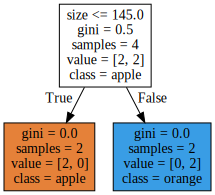

In [27]:
tree.export_graphviz(
        clf,
        out_file="iris_tree.dot",
        feature_names=["size","skin"],
        class_names=["apple", "orange"],
        rounded=False,
        filled=True
    )

Source.from_file("iris_tree.dot")

## Use the Model

In [30]:
print (clf.predict([[146,1]]))

[1]


# **Convertion of the model**

In [31]:
!pip install micromlgen

Defaulting to user installation because normal site-packages is not writeable


In [32]:
from micromlgen import port

In [33]:
Labels = ["apple","orange"]
classMap = {}
for i,label in zip(range(2),Labels):
    classMap[i]=label

print(classMap)

{0: 'apple', 1: 'orange'}


In [35]:
c_code = port(clf,classmap=classMap)

modelFile = open("../Firmware/include/model.h","w")
modelFile.write(c_code)
modelFile.close()

import os
model_h_size = os.path.getsize("../Firmware/include/model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 1,403 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


## **Réferances**

https://github.com/Bsm-B/WorkShop_AI_For_IoT